In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import keras
import tensorflow as tf
import tensorflow_hub as hub


ModuleNotFoundError: No module named 'tensorflow_hub'

In [4]:
#%cd apples 
#!unzip apple.zip

/home/byshadowoz/AppleQuality/AppleClasifficationModel/apples
Archive:  apple.zip
  inflating: 1F-fgyxhr1s8FWNsSj1O3vw.jpeg  
  inflating: 6fbf7d10038ec3186b648b9a1f219573def7da08_FruitsandVegetables_29896_01.jpg  
  inflating: 9e5520e5d3932fbe4b6362fa66d04069.jpg  
  inflating: 38bfd87be9248cc9fa0abc775cef3c50.jpg  
  inflating: 51kO14HzkzL._AC_UF10001000_QL80_.jpg  
  inflating: 54f93200ecc09_-_apple-red-flesh-590.jpg  
  inflating: 81aRkv2DltL._AC_UF10001000_QL80_.jpg  
  inflating: 319J7YpfyNL._AC_UF10001000_QL80_.jpg  
  inflating: 1000_F_138358313_26XjUJlN4q8IcZY6VKd6CvCfeBiVs97k.jpg  
  inflating: 1000_F_176979696_hqfioFYq7pX13dmiu9ENrpsHZy1yM3Dt.jpg  
  inflating: 1000_F_194152773_lF0xxlrclLpJi2FCoRCmXTsoS3pwJaDv.jpg  
  inflating: 1000_F_210597040_wxyvT8wGl322pfG6xO4LGW4FCWTgkOyX.jpg  
  inflating: 1130px-Red_Apple.jpg    
  inflating: 2011.png                
  inflating: 3584.jpg                
  inflating: 5695.jpg                
  inflating: 5837.jpg                
  in

In [13]:
#quantity of images
#!ls | wc -l #493

493


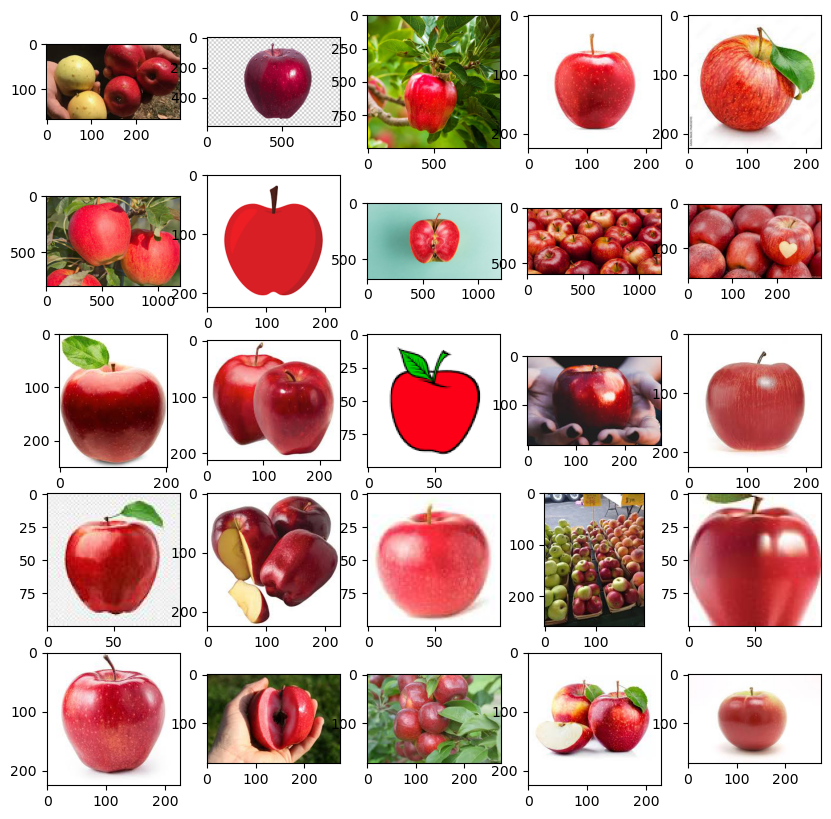

In [18]:
plt.figure(figsize=(10,10))

carpet = '/home/byshadowoz/AppleQuality/AppleClasifficationModel/dataset/apples'
images = os.listdir(carpet)

for i, nameimg in enumerate(images[:25]):
    plt.subplot(5,5,i +1)
    imagen = mpimg.imread(carpet + '/' + nameimg)
    plt.imshow(imagen)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#create dataset
datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split =0.2
)

In [22]:
data_gen_ent = datagen.flow_from_directory('/home/byshadowoz/AppleQuality/AppleClasifficationModel/dataset', target_size=(224,224),
                                           batch_size=32, shuffle=True, subset='training')
data_gen_pru = datagen.flow_from_directory('/home/byshadowoz/AppleQuality/AppleClasifficationModel/dataset', target_size=(224,224),
                                           batch_size=32, shuffle=True, subset='validation')

Found 395 images belonging to 1 classes.
Found 98 images belonging to 1 classes.


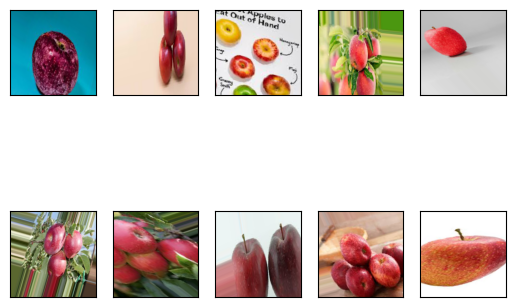

In [23]:
for imagen, etiqueta in data_gen_ent:
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
    break
plt.show()

In [25]:
url = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-feature-vector/versions/2"

mobilenetv2 = hub.KerasLayer(url, input_shape(224,224,3), trainable=False)

ModuleNotFoundError: No module named 'tensorflow_hub'